## Example of comparing several AIMIP models

In [143]:
import xarray as xr
import s3fs
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

### Open data

Connect to the cloud:

In [2]:
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': 'https://s3.eu-dkrz-1.dkrz.cloud'},anon=True)

First we have to create lists of the files that are available for models. The folder structure is still not exactly the same, so one should be aware of that:

In [117]:
files_arches = fs.glob('ai-mip/ArchesWeather/ArchesWeather-V2/aimip/r1i1p1f1/Amon/tas/gn/*')
files_ace2 = fs.glob('ai-mip/Ai2/ACE2-1-ERA5/aimip/r1i1p1f1/Amon/tas/gn/*/*')
files_neuralgcm = fs.glob('ai-mip/Google/NeuralGCM/aimip/r1i1p1f1/Amon/tas/gn/*/*')
files_md1p5 = fs.glob('ai-mip/UMD-PARETO/MD-1p5/aimip/r1i1p1f1/Amon/tas/gr/v20251217/*')

We also can have a look what ERA5 monthly files are available (for quick comparison):

In [145]:
fs.glob('ai-mip/ERA5/mon/*')

['ai-mip/ERA5/mon/ERA5_2m_temperature_mon_full_sfc_1940-2024.nc',
 'ai-mip/ERA5/mon/ERA5_evaporation_mon_full_sfc_1940-2024.nc',
 'ai-mip/ERA5/mon/ERA5_high_could_cover_mon_full_sfc_1940-2024.nc',
 'ai-mip/ERA5/mon/ERA5_low_cloud_cover_mon_full_sfc_1940-2024.nc',
 'ai-mip/ERA5/mon/ERA5_mean_sea_level_pressure_mon_full_sfc_1940-2024.nc',
 'ai-mip/ERA5/mon/ERA5_medium_cloud_cover_mon_full_sfc_1940-2024.nc',
 'ai-mip/ERA5/mon/ERA5_sea_ice_cover_mon_full_sfc_1940-2024.nc',
 'ai-mip/ERA5/mon/ERA5_sea_surface_temperature_mon_full_sfc_1940-2024.nc',
 'ai-mip/ERA5/mon/ERA5_specific_humidity_mon_full_plev8_1940-2024.nc',
 'ai-mip/ERA5/mon/ERA5_surface_latent_heat_flux_mon_full_sfc_1940-2024.nc',
 'ai-mip/ERA5/mon/ERA5_surface_net_solar_radiation_clear_sky_mon_full_sfc_1940-2024.nc',
 'ai-mip/ERA5/mon/ERA5_surface_net_solar_radiation_mon_full_sfc_1940-2024.nc',
 'ai-mip/ERA5/mon/ERA5_surface_net_thermal_radiation_clear_sky_mon_full_sfc_1940-2024.nc',
 'ai-mip/ERA5/mon/ERA5_surface_net_thermal_ra

Next we open 2m temperature files, and load them to xarray:

In [119]:
open_files = [fs.open(f) for f in files_arches]
ds_arches = xr.open_mfdataset(
    open_files,
    engine='h5netcdf',
    combine='by_coords'
)

open_files = [fs.open(f) for f in files_ace2]
ds_ace2 = xr.open_mfdataset(
    open_files,
    engine='h5netcdf',
    combine='by_coords'
)

open_files = [fs.open(f) for f in files_neuralgcm]
ds_neuralgcm = xr.open_mfdataset(
    open_files,
    engine='h5netcdf',
    combine='by_coords'
)

open_files = [fs.open(f) for f in files_md1p5]
ds_md1p5 = xr.open_mfdataset(
    open_files,
    engine='h5netcdf',
    combine='by_coords'
)

We also open ERA5 2m temperature data

In [64]:
era5_temp = xr.open_mfdataset(
    [fs.open('ai-mip/ERA5/mon/ERA5_2m_temperature_mon_full_sfc_1940-2024.nc')],
    engine='h5netcdf',
    combine='by_coords'
)

This is how one of the datasets looks like:

In [66]:
ds_arches

<xarray.Dataset> Size: 145MB
Dimensions:    (time: 556, lat: 181, lon: 360, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 4kB 1978-10-16 ... 2025-01-01
  * lon        (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 1kB 90.0 89.0 88.0 87.0 ... -87.0 -88.0 -89.0 -90.0
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 145MB dask.array<chunksize=(1, 181, 360), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] 9kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 3kB dask.array<chunksize=(181, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 6kB dask.array<chunksize=(360, 2), meta=np.ndarray>
Attributes: (12/47)
    CDI:                   Climate Data Interface version 1.9.9 (https://mpim...
    Conventions:           CF-1.7 CMIP-6.2
    frequency:             mon
    CDO:                   Climate Data Operators version 1.9.9 (https://mpim...
    variable_id:           tas
    activity_id:           AIMIP
    ...                    ...
    variant_label:         r1i1p1f1
    license:               
    cmor_version:          3.5.0
    tracking_id:           0d300ce9-7c21-4f99-a3d3-e746329461f9
    history:               Mon Dec 15 17:39:43 2025: ncatted -O -a coordinate...
    NCO:                   netCDF Operators version 5.2.4 (Homepage = http://...

Let's plot one time step from each of the datasets, to have a look at the data:

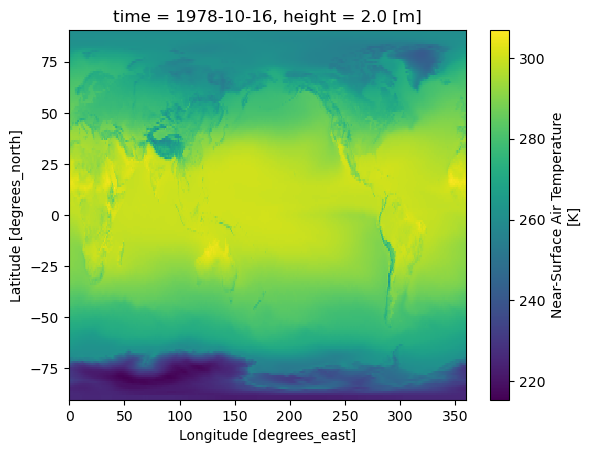

In [30]:
ds_arches['tas'][0,:].plot()

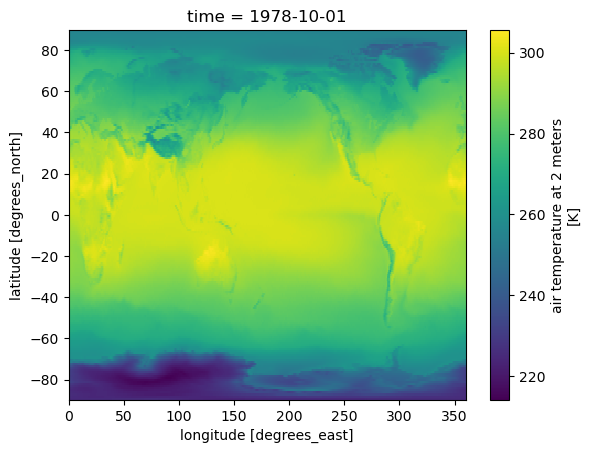

In [31]:
ds_ace2['tas'][0,:].plot()

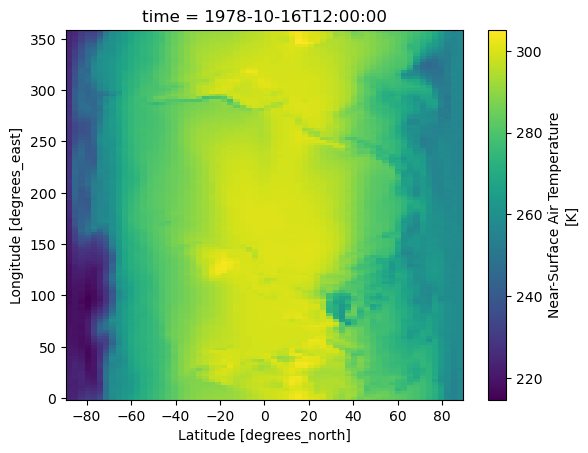

In [32]:
ds_neuralgcm['tas'][0,:].plot()

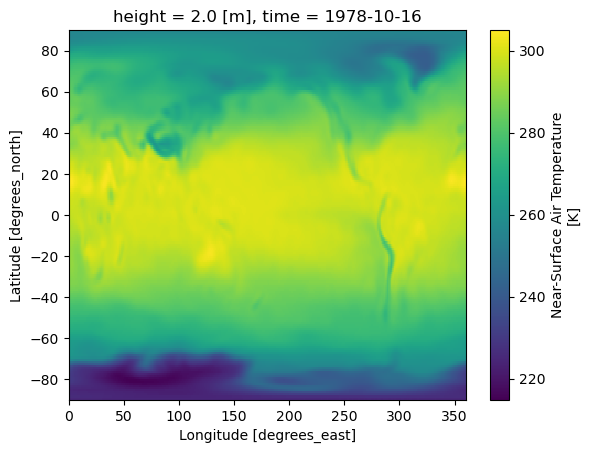

In [33]:
ds_md1p5['tas'][0,:].plot()

### Time mean

Now we compute time mean of the 2m temperature fields. We do it only for 10 years for speed:

In [57]:
ds_arches_mean = ds_arches['tas'].sel(time=slice("2000", "2009")).mean(dim='time').compute()
ds_ace2_mean = ds_ace2['tas'].sel(time=slice("2000", "2009")).mean(dim='time').compute()
ds_neuralgcm_mean = ds_neuralgcm['tas'].sel(time=slice("2000", "2009")).mean(dim='time').compute()
ds_md1p5_mean = ds_md1p5['tas'].sel(time=slice("2000", "2009")).mean(dim='time').compute()

Same computation for ERA5, as it is 1/4 degree data, computation takes a bit longer:

In [69]:
ds_era5_mean = era5_temp['T2M'].sel(time=slice("2000", "2009")).mean(dim='time').compute()

We can now compare individual model means to ERA5 for 10 years:

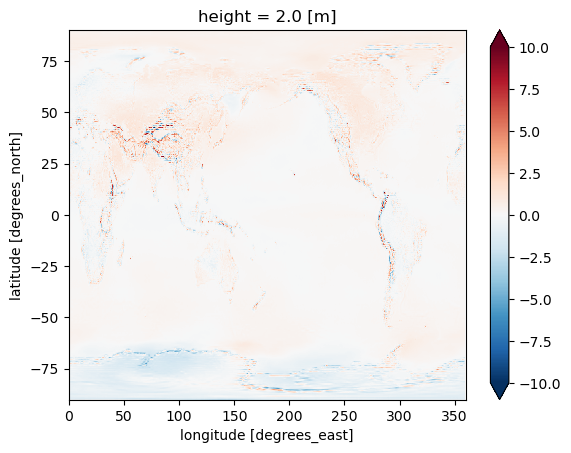

In [146]:
(ds_arches_mean.interp(lat=ds_era5_mean.lat, lon=ds_era5_mean.lon) - ds_era5_mean).plot(vmin=-10, vmax=10, cmap=cm.RdBu_r)

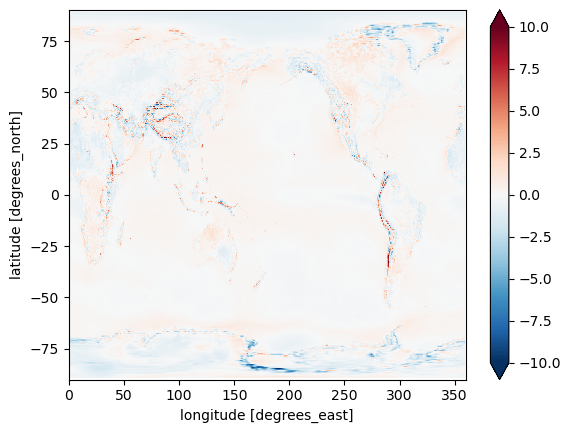

In [147]:
(ds_ace2_mean.interp(lat=ds_era5_mean.lat, lon=ds_era5_mean.lon) - ds_era5_mean).plot(vmin=-10, vmax=10, cmap=cm.RdBu_r)

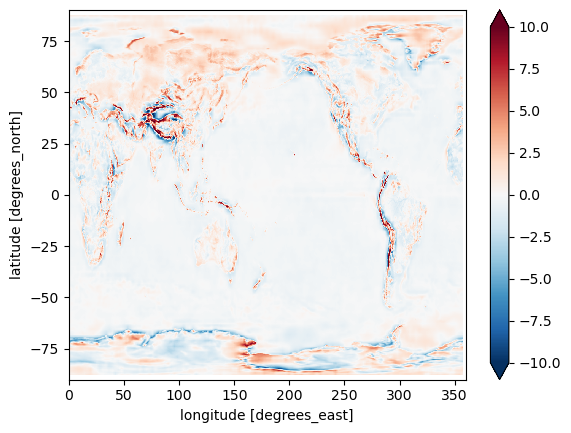

In [149]:
(ds_neuralgcm_mean.interp(lat=ds_era5_mean.lat, lon=ds_era5_mean.lon) - ds_era5_mean).T.plot(vmin=-10, vmax=10, cmap=cm.RdBu_r)

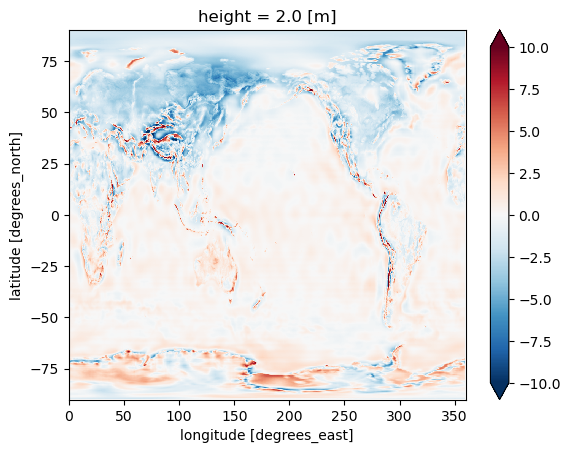

In [150]:
(ds_md1p5_mean.interp(lat=ds_era5_mean.lat, lon=ds_era5_mean.lon) - ds_era5_mean).plot(vmin=-10, vmax=10, cmap=cm.RdBu_r)

It is nicer when we plot them all together:

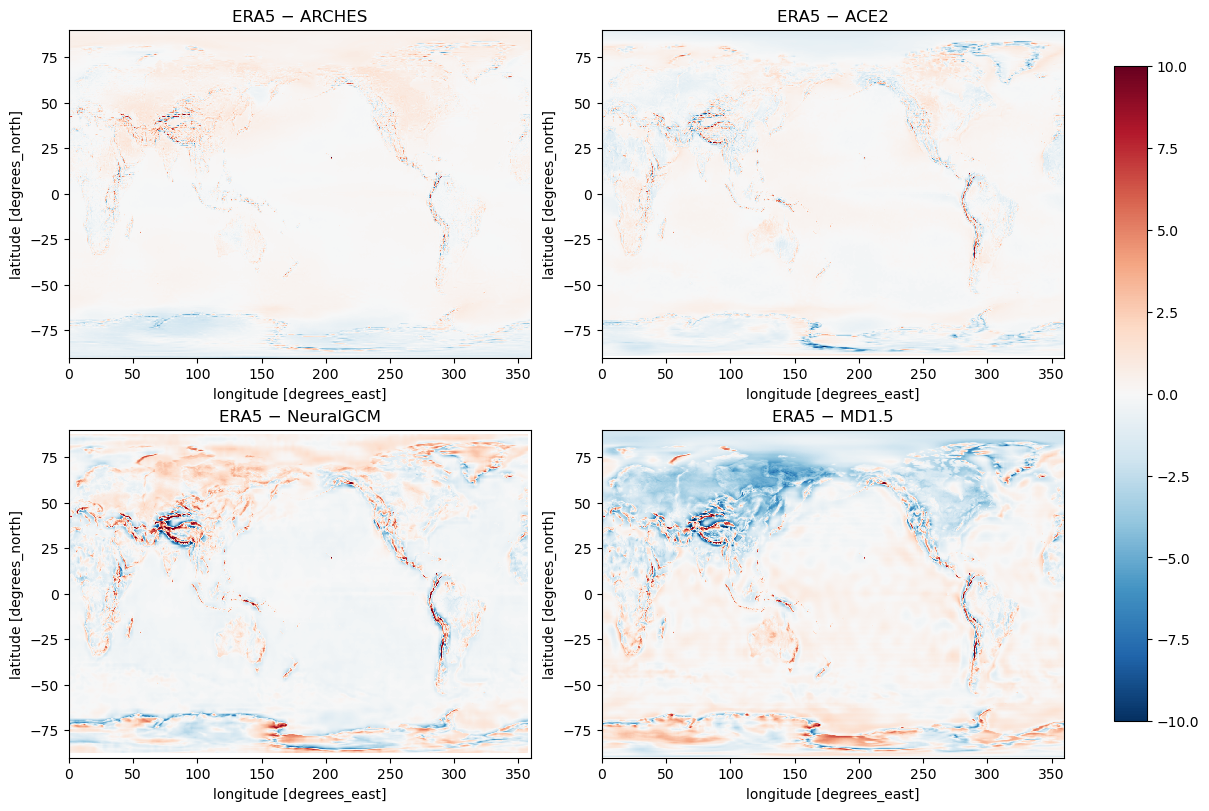

In [155]:
models = [
    ("ARCHES",     ds_arches_mean),
    ("ACE2",       ds_ace2_mean),
    ("NeuralGCM",  ds_neuralgcm_mean),
    ("MD1.5",      ds_md1p5_mean),
]

fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)

vmin, vmax = -10, 10
cmap = cm.RdBu_r

mappables = []
for ax, (name, ds_model) in zip(axes.ravel(), models):
    da = ds_model.interp(lat=ds_era5_mean.lat, lon=ds_era5_mean.lon) - ds_era5_mean
    if name=="NeuralGCM":
        da = da.T
    m = da.plot(ax=ax, vmin=vmin, vmax=vmax, cmap=cmap, add_colorbar=False)
    ax.set_title(f"ERA5 − {name}")
    mappables.append(m)

# one shared colorbar (use the first mappable)
cbar = fig.colorbar(mappables[0], ax=axes, shrink=0.9, label=da.name if getattr(da, "name", None) else "")
# plt.show()

A bit slower, but nicer looking maps:

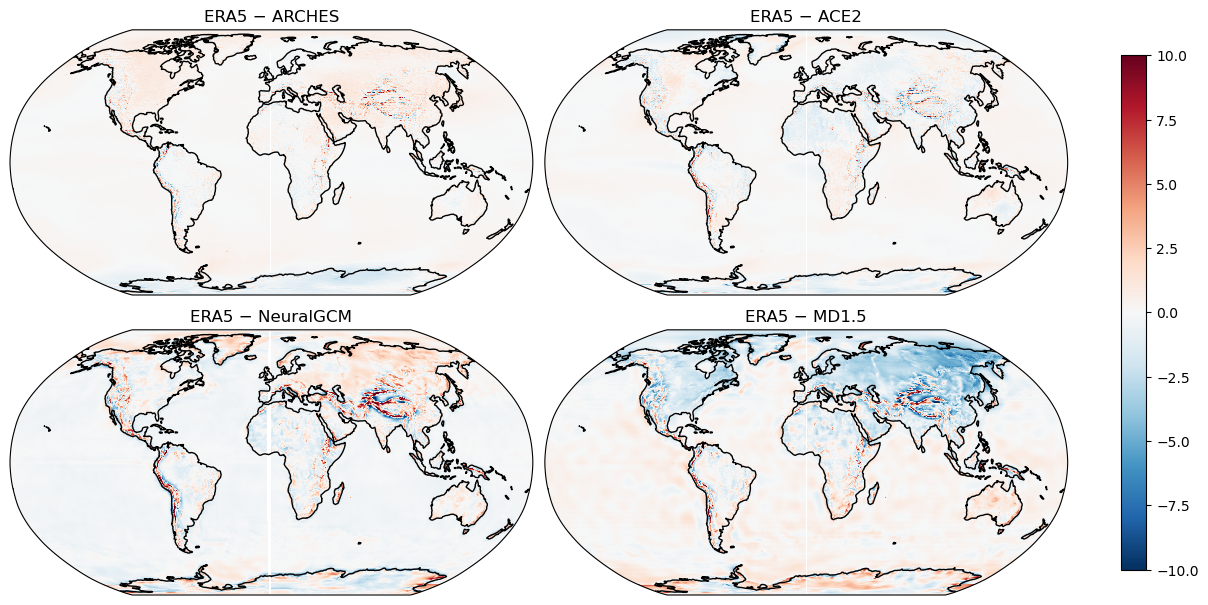

In [156]:
projection = ccrs.Robinson()
models = [
    ("ARCHES",     ds_arches_mean),
    ("ACE2",       ds_ace2_mean),
    ("NeuralGCM",  ds_neuralgcm_mean),
    ("MD1.5",      ds_md1p5_mean),
]

fig, axes = plt.subplots(2, 2, figsize=(12, 6), constrained_layout=True, subplot_kw=dict(projection=projection))

vmin, vmax = -10, 10
cmap = cm.RdBu_r

mappables = []
for ax, (name, ds_model) in zip(axes.ravel(), models):
    da = ds_model.interp(lat=ds_era5_mean.lat, lon=ds_era5_mean.lon) - ds_era5_mean
    if name=="NeuralGCM":
        da = da.T
    m = da.plot(ax=ax, vmin=vmin, vmax=vmax, cmap=cmap, add_colorbar=False, transform=ccrs.PlateCarree())
    ax.set_title(f"ERA5 − {name}")
    ax.coastlines()
    mappables.append(m)

# one shared colorbar (use the first mappable)
cbar = fig.colorbar(mappables[0], ax=axes, shrink=0.9, label=da.name if getattr(da, "name", None) else "")

## Time series of spatial mean

Now we will compute weighted averages of the 2m temperature. First example for one model:

In [96]:
weights_arches = np.cos(np.deg2rad(ds_arches.lat))
weights_arches.name = "weights_arches"

In [105]:
ds_arches_weighted = ds_arches['tas'].sel(time=slice("2000", "2009")).weighted(weights_arches)
ds_arches_weighted

DataArrayWeighted with weights along dimensions: lat

In [109]:
ds_arches_weighted_mean = ds_arches_weighted.mean(("lon", "lat")).compute()

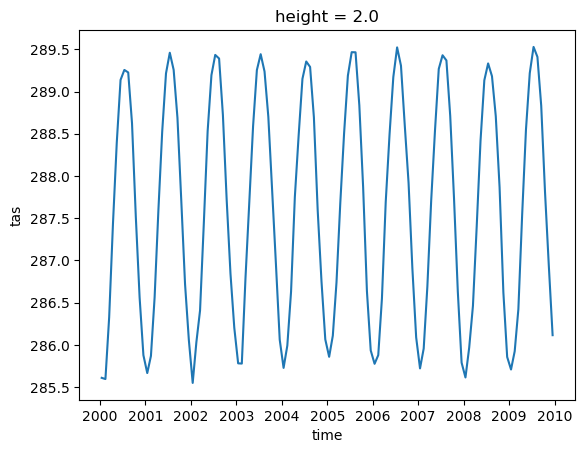

In [108]:
ds_arches_weighted_mean.plot()

Now let's compute it for all the models, but only for 10 years for speed:

In [128]:
def area_weighted_mean(ds_or_da, var, time_slice=("2000-01-01", "2009-12-31"),
                       lat_name=None, lon_name=None):
    da = ds_or_da[var] if isinstance(ds_or_da, xr.Dataset) else ds_or_da

    if lat_name is None:
        lat_name = next(n for n in ["lat", "latitude", "y"] if n in da.dims or n in da.coords)
    if lon_name is None:
        lon_name = next(n for n in ["lon", "longitude", "x"] if n in da.dims or n in da.coords)

    da = da.sel(time=slice(*time_slice))

    weights = np.cos(np.deg2rad(da[lat_name]))
    weights.name = "area_weights"

    return da.weighted(weights).mean(dim=(lon_name, lat_name))


def month_key(da):
    # stable month identifier, avoids exact timestamp mismatch
    return da["time"].dt.strftime("%Y-%m")


def to_month_indexed(da):
    # add month coordinate, use it as the dimension, drop old time dim
    mk = month_key(da)
    return da.assign_coords(month=mk).swap_dims({"time": "month"}).drop_vars("time")


def align_model_to_era5_months(model_da, era5_da, strict=True):
    era5_m = to_month_indexed(era5_da)
    model_m = to_month_indexed(model_da)

    # checks (month coords are small, safe to pull into memory)
    n_era = era5_m.sizes["month"]
    n_mod = model_m.sizes["month"]
    if n_mod != n_era:
        raise ValueError(f"Time-step mismatch: model has {n_mod} months, ERA5 has {n_era} months.")

    if strict:
        era_set = set(era5_m["month"].values.tolist())
        mod_set = set(model_m["month"].values.tolist())
        missing = sorted(era_set - mod_set)
        extra   = sorted(mod_set - era_set)
        if missing or extra:
            raise ValueError(
                "Month keys differ between model and ERA5.\n"
                f"Missing in model (first 5): {missing[:5]}\n"
                f"Extra in model (first 5): {extra[:5]}"
            )

    # reindex model onto ERA5 month keys (prevents NaNs due to timestamp mismatch)
    aligned_m = model_m.reindex(month=era5_m["month"])

    # restore ERA5 timestamps as the canonical time axis
    aligned = aligned_m.rename({"month": "time"}).assign_coords(time=era5_da["time"].values)
    return aligned


# ---- configure sources (dataset, variable-name) ----
sources = {
    "ERA5":      (era5_temp,   "T2M"),
    "ARCHES":    (ds_arches,   "tas"),
    "ACE2":      (ds_ace2,     "tas"),
    "NeuralGCM": (ds_neuralgcm,"tas"),
    "MD1.5":     (ds_md1p5,    "tas"),
}

time_slice = ("2000-01-01", "2009-12-31")

# compute ERA5 reference series (lazy)
era5_da = area_weighted_mean(*sources["ERA5"], time_slice=time_slice)

# compute + align everyone to ERA5 months, then put on ERA5 timestamps
out = {"ERA5": era5_da}
for name, (ds, var) in sources.items():
    if name == "ERA5":
        continue
    model_da = area_weighted_mean(ds, var, time_slice=time_slice)
    out[name] = align_model_to_era5_months(model_da, era5_da, strict=True)

means_ds = xr.Dataset(out).compute()
means_ds


<xarray.Dataset> Size: 5kB
Dimensions:    (time: 120)
Coordinates:
  * time       (time) datetime64[ns] 960B 2000-01-01 2000-02-01 ... 2009-12-01
    height     float64 8B 2.0
Data variables:
    ERA5       (time) float64 960B 285.2 285.7 286.3 287.4 ... 287.7 286.7 285.9
    ARCHES     (time) float64 960B 285.6 285.6 286.3 287.4 ... 287.8 286.9 286.1
    ACE2       (time) float32 480B 285.5 285.8 286.7 287.5 ... 287.6 286.7 286.1
    NeuralGCM  (time) float64 960B 285.1 285.5 286.4 287.0 ... 287.6 286.6 286.2
    MD1.5      (time) float64 960B 284.7 284.7 285.5 286.9 ... 288.1 287.0 285.6

Plot it:

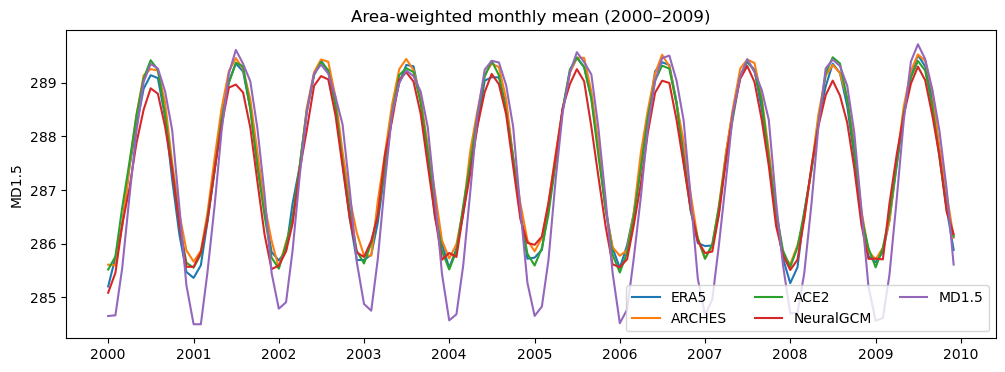

In [134]:
fig, ax = plt.subplots(figsize=(12, 4))

for name, da in means_ds.data_vars.items():
    da.plot(ax=ax, label=name)

ax.set_title("Area-weighted monthly mean (2000–2009)")
ax.set_xlabel("")
ax.legend(ncol=3)

Resample to yearly means:

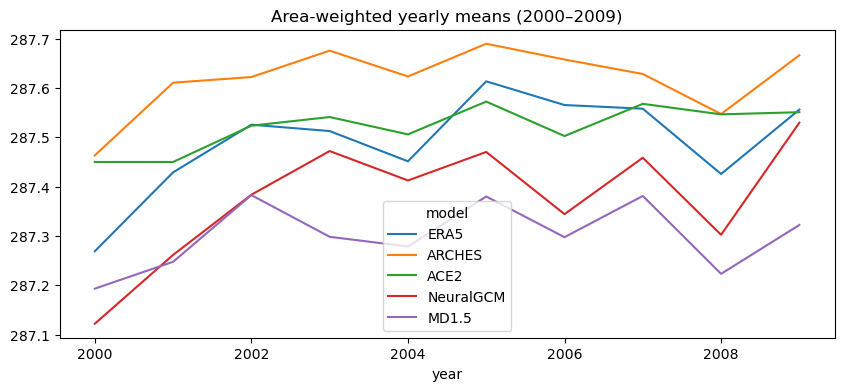

In [137]:
means_year = means_ds.resample(time="YS").mean()
means_year = means_year.assign_coords(year=means_year["time"].dt.year).swap_dims({"time": "year"}).drop_vars("time")

fig, ax = plt.subplots(figsize=(10, 4))
means_year.to_array("model").plot.line(x="year", hue="model", ax=ax)
ax.set_title("Area-weighted yearly means (2000–2009)")
plt.show()


Longer time series of 2m temerature (takes more time to compute)

In [138]:
# ---- configure sources (dataset, variable-name) ----
sources = {
    "ERA5":      (era5_temp,   "T2M"),
    "ARCHES":    (ds_arches,   "tas"),
    "ACE2":      (ds_ace2,     "tas"),
    "NeuralGCM": (ds_neuralgcm,"tas"),
    "MD1.5":     (ds_md1p5,    "tas"),
}

time_slice = ("1980-01-01", "2020-12-31")

# compute ERA5 reference series (lazy)
era5_da = area_weighted_mean(*sources["ERA5"], time_slice=time_slice)

# compute + align everyone to ERA5 months, then put on ERA5 timestamps
out = {"ERA5": era5_da}
for name, (ds, var) in sources.items():
    if name == "ERA5":
        continue
    model_da = area_weighted_mean(ds, var, time_slice=time_slice)
    out[name] = align_model_to_era5_months(model_da, era5_da, strict=True)

means_ds_longer = xr.Dataset(out).compute()
means_ds_longer

<xarray.Dataset> Size: 22kB
Dimensions:    (time: 492)
Coordinates:
  * time       (time) datetime64[ns] 4kB 1980-01-01 1980-02-01 ... 2020-12-01
    height     float64 8B 2.0
Data variables:
    ERA5       (time) float64 4kB 285.3 285.6 286.3 287.3 ... 288.0 287.1 286.1
    ARCHES     (time) float64 4kB 285.3 285.6 286.3 287.3 ... 288.1 286.9 286.2
    ACE2       (time) float32 2kB 285.5 285.9 286.5 287.5 ... 287.9 286.9 285.8
    NeuralGCM  (time) float64 4kB 285.2 285.5 286.0 287.2 ... 287.6 286.6 285.8
    MD1.5      (time) float64 4kB 284.4 284.6 285.3 286.6 ... 288.2 287.0 285.3

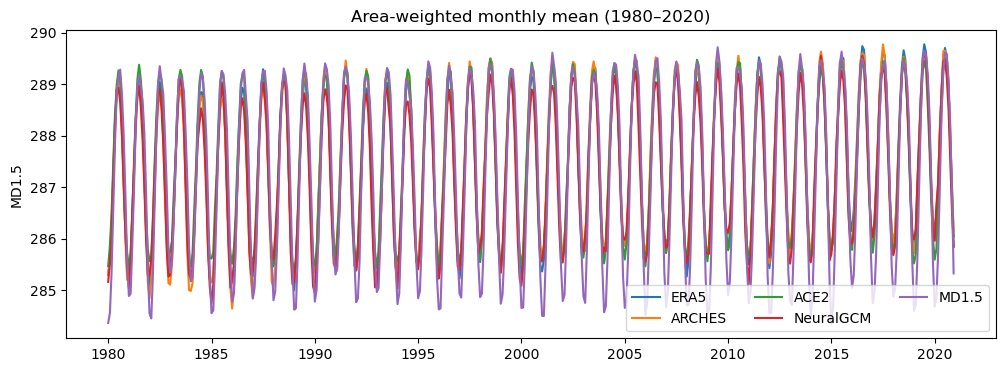

In [142]:
fig, ax = plt.subplots(figsize=(12, 4))

for name, da in means_ds_longer.data_vars.items():
    da.plot(ax=ax, label=name)

ax.set_title("Area-weighted monthly mean (1980–2020)")
ax.set_xlabel("")
ax.legend(ncol=3)

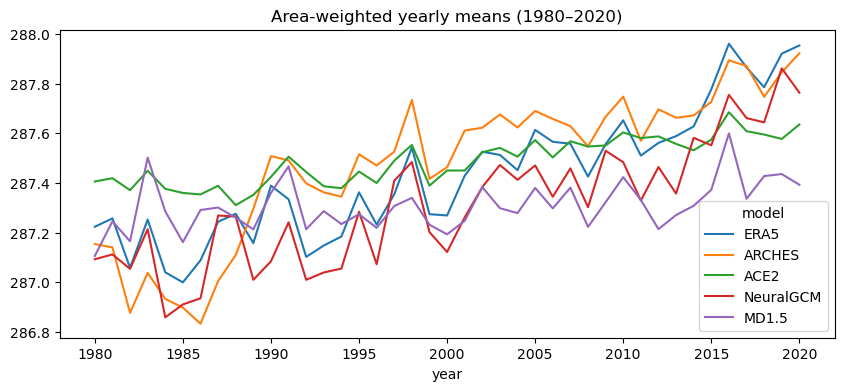

In [141]:
means_year = means_ds_longer.resample(time="YS").mean()
means_year = means_year.assign_coords(year=means_year["time"].dt.year).swap_dims({"time": "year"}).drop_vars("time")

fig, ax = plt.subplots(figsize=(10, 4))
means_year.to_array("model").plot.line(x="year", hue="model", ax=ax)
ax.set_title("Area-weighted yearly means (1980–2020)")
plt.show()